second

# Fitting a Quadratic Model

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [17]:
a = a_true
b = b_true
c = c_true
X = np.linspace(-5,5,num=30)
noise = np.random.normal(0,2.0, size=30)

In [18]:
Y = a*X**2+b*X+c+noise

In [19]:
def y_model(X,a,b,c):
    y_model = a * X**2 + b*X + c
    return y_model

In [20]:
#Y = y_model(X,a,b,c)

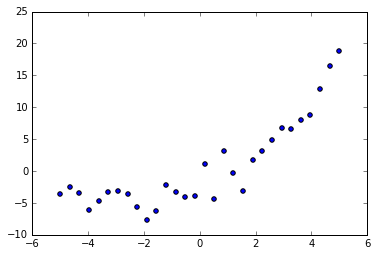

In [21]:
plt.scatter(X,Y)

Now fit the model to the dataset to recover estimates for the model's parameters:

* Use `scipy.optimize.curve_fit`.
* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [22]:
opt.curve_fit(y_model,X,Y)

(array([ 0.40383915,  1.90825177, -2.8902243 ]),
 array([[  1.97446104e-03,   4.88762919e-11,  -1.75885897e-02],
        [  4.88762919e-11,   1.40239164e-02,  -4.76306288e-10],
        [ -1.75885897e-02,  -4.76306288e-10,   2.81605658e-01]]))

In [23]:
best, cov = opt.curve_fit(y_model,X,Y)

In [24]:
a_best = best[0]
b_best = best[1]
c_best = best[2]

In [25]:
#Format from class example
print('a = {0:.3f} +/- {1:.3f}'.format(best[0], np.sqrt(cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(best[1], np.sqrt(cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(best[2], np.sqrt(cov[2,2])))

a = 0.404 +/- 0.044
b = 1.908 +/- 0.118
c = -2.890 +/- 0.531


In [29]:
xfit = np.linspace(-5,5,num=30)
yfit = a_best * xfit**2 + b_best*xfit + c_best

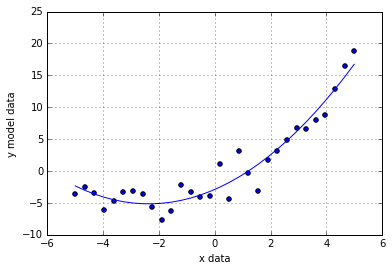

In [34]:
plt.plot(xfit, yfit)
plt.scatter(X, Y)
plt.xlabel("x data")
plt.ylabel("y model data")
plt.grid()